In [1]:
# Libraries
library(e1071) # for svm()
library(ROCR) # for ROC curve
library(ISLR) # for Gene data

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



## 1. Maximal Margin Classifier（マージン最大化分類）

### 1. 超平面って何？

p次元のデータに対して，(p-1)次元の平面で切り分ける。この(p-1)次元の平面をpの値によらず「超平面」という

p次元のデータを切り分ける平面の式はこのようになる
$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p = 0 \tag{9.2}
$$
実際には，
$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p > 0 \tag{9.3}
$$
$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p < 0 \tag{9.4}
$$
のどちらを満たすかで，超平面のどちら側であるのかを定める

個人的には，超平面については，ML_deepさんの(SVM、ニューラルネットなどに共通する分類問題における考え方)[ https://www.hellocybernetics.tech/entry/2017/03/08/053000 ]のページにおける超平面の考え方がわかりやすいと思う

### 2. 分離超平面を用いた分類

$y_i = 1$の時（9.3）式，$y_i = -1$の時（9.4）式を適応させる。これらは，次の式（9.8）と同義である。
$$
y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + \beta_p X_{ip}) > 0 \tag{9.8}
$$
ここで，$f(x^*) = \beta_0 + \beta_1 X_1^* + \beta_2 X_2^* + \dots + \beta_p X_p^*$として，$f(x^*)$が0よりも離れている程，よく分類できており，0に近い程，曖昧な分類となる

### 3. マージン最大化分類

別名「最適分離超平面」，訓練データから分離超平面を最も離れさせる方法である。平面から最も距離が小さいデータをマージンと呼び，このマージンとの距離を最大化させる。実際には$f(x^*)$が最小となるマージンの$f(x^*)$を最大化させる。この方法はよく上手くいくが，pが大きすぎると過学習してしまう。

マージンと同じ距離のデータを「サポートベクトル」といい，マージン最大化平面を決定する「サポート」を行うデータである。

### 4. マージン最大化分類の構築

マージンMの最大化は，最適化問題として以下から導くことができる。
$$
\underset{\beta_0, \beta_1, \dots, \beta_p, M}{maximize} M \tag{9.9}
$$
$$
\sum_{j=1}^p \beta_j^2 = 1 \tag{9.10}
$$
$$
y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + \beta_p X_{ip}) \geq M \ \forall \ i = 1, \dots, n \tag{9.11}
$$
式（9.10）によって，$y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + \beta_p X_{ip})$が超平面からの距離となる。

### 5. 分けられない場合

本来，分離可能な超平面が存在する方が稀である。そこで，誤分類を認めた超平面を作成するソフトマージンを使用する。このケースがサポートベクトル分類である。

## 2. Support Vector Classifiers（サポートベクトル分類）

### 1. サポートベクトル分類の概要

個々の観測に対する堅牢性が向上し、ほとんどの訓練観測の分類が改善される。

### 2. サポートベクトル分類の詳細

誤分類を多少許すので，サポートベクトル分類の最適化問題は次のようになる。
$$
\underset{\beta_0, \beta_1, \dots, \beta_p, \epsilon_1, \dots, \epsilon_n, M}{maximize} M \tag{9.12}
$$
$$
\sum_{j=1}^p \beta_j^2 = 1 \tag{9.13}
$$
$$
y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + \beta_p X_{ip}) \geq M(1 - \epsilon_i) \ \forall \ i = 1, \dots, n \tag{9.14}
$$
$$
\epsilon_i \geq 0, \sum_{i=1}^n \epsilon_i \leq C \tag{9.15}
$$
ここで，Cは0以上のチューニングパラメータである。

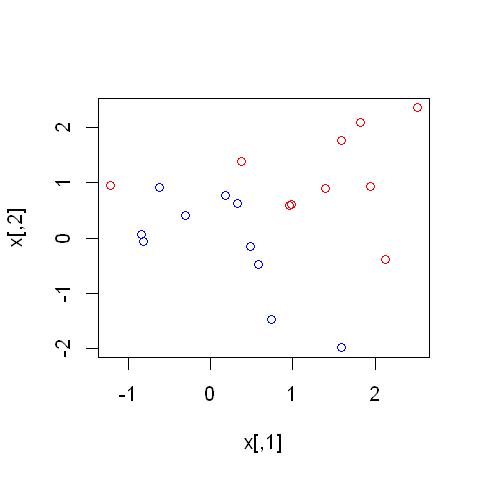

In [2]:
# Support Vector Classifier
set.seed(1)
x = matrix(rnorm(20 * 2), ncol=2)
y = c(rep(-1, 10), rep(1, 10))
x[y == 1, ] = x[y == 1, ] + 1
options(repr.plot.width=4, repr.plot.height=4) # jupyter用
plot(x, col=(3 - y))

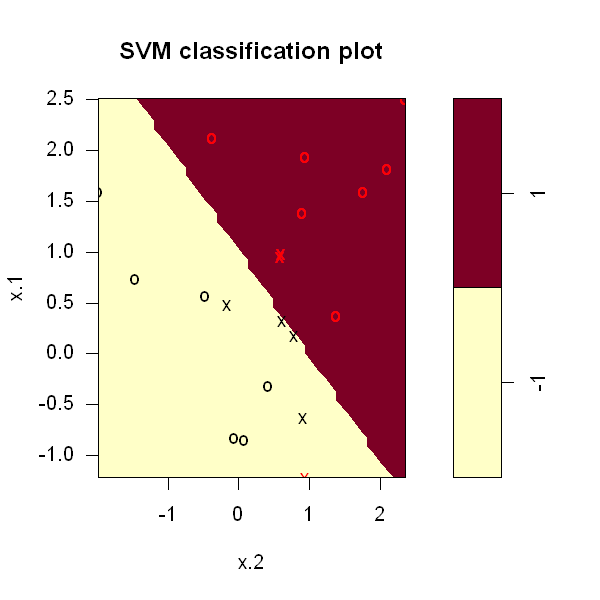

In [3]:
# サポートベクトル分類
dat = data.frame(x=x, y=as.factor(y))
svmfit = svm(y~., data=dat, kernel='linear', cost=10, scale=FALSE)
options(repr.plot.width=5, repr.plot.height=5) # jupyter用
plot(svmfit, dat)

In [4]:
print(svmfit$index)
print(summary(svmfit))

[1]  1  2  5  7 14 16 17

Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1





 [1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20


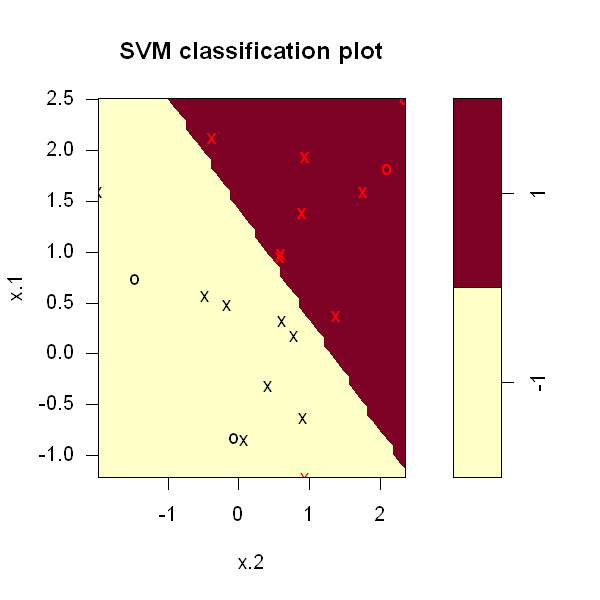

In [5]:
# smaller cost →　larger number of support vectors
svmfit = svm(y~., data=dat, kernel='linear', cost=0.1, scale=FALSE)
plot(svmfit, dat)
print(svmfit$index)

In [6]:
# tuning cost parameter
set.seed(1)
tune.out = tune(svm, y~., data=dat, kernel="linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1, 5, 10, 100)))
print(summary(tune.out))
bestmod = tune.out$best.model
print(summary(bestmod))


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1





In [7]:
# best parameter test
xtest = matrix(rnorm(20 * 2), ncol=2)
ytest = sample(c(-1, 1), 20, rep=TRUE)
xtest[ytest == 1, ] = xtest[ytest == 1, ] + 1
testdat = data.frame(x = xtest, y = as.factor(ytest))
ypred = predict(bestmod, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  9 1
     1   2 8

In [8]:
# when cost = 0.01
svmfit = svm(y~., data=dat, kernel='linear', cost=0.01, scale=FALSE)
ypred = predict(svmfit, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  6
     1   0  3

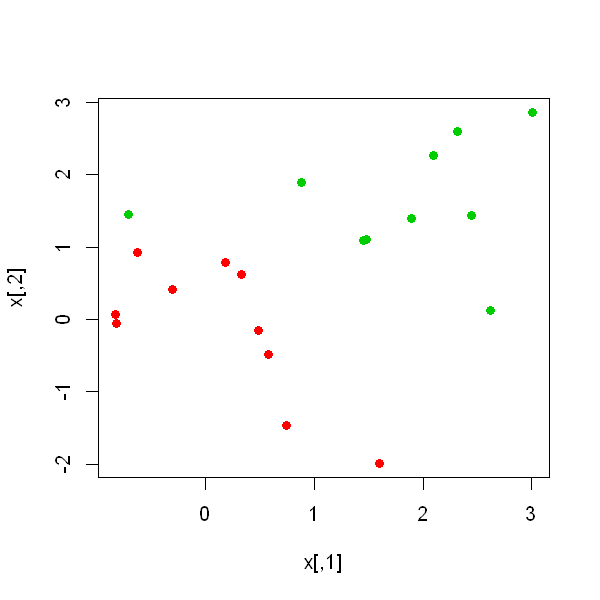

In [9]:
# 分けられるデータの作成
x[y == 1, ] = x[y == 1, ] + 0.5
plot(x, col=(y + 5) / 2, pch=19)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3



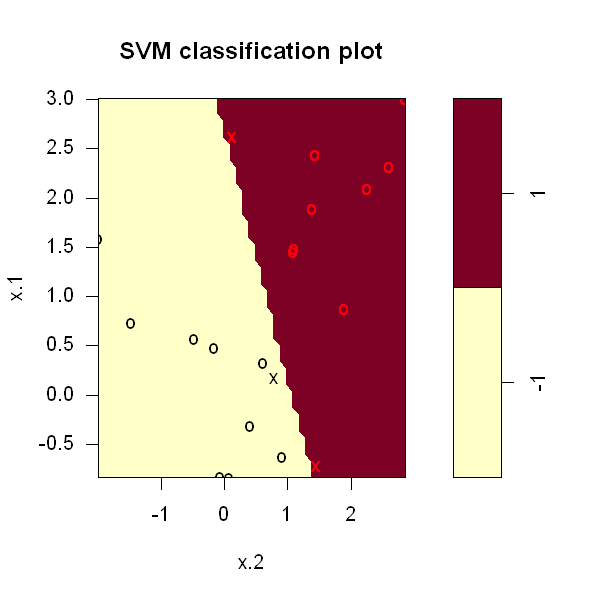

In [10]:
# サポートベクトル分類（×はサポートベクトル）
dat = data.frame(x=x, y=as.factor(y))
svmfit = svm(y~., data=dat, kernel="linear", cost=1.0e5)
print(svmfit)
plot(svmfit, dat)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7



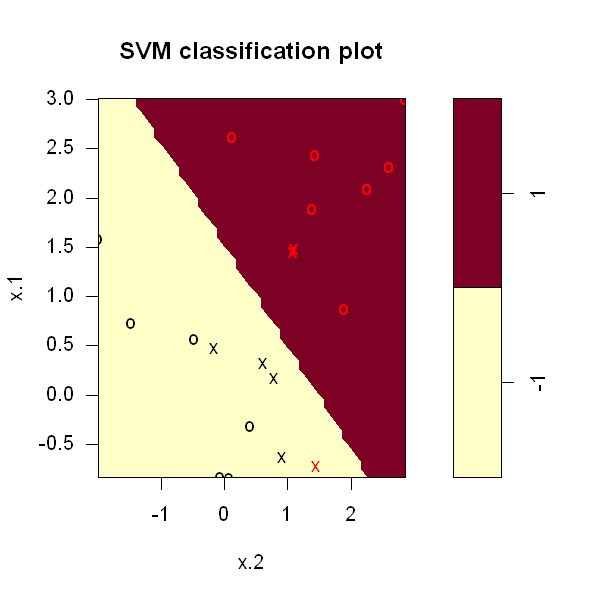

In [11]:
# cost = 1 （誤分類が増えたので，cost = 1.0e05の方が良さそう）
svmfit = svm(y~., data=dat, kernel="linear", cost=1.0)
print(svmfit)
plot(svmfit, dat)

## 3. Support Vector Machines

### 1. 非線形決定境界を用いた分類

線形で分類できるものはサポートベクトル分類でいいが，大抵のものは線形で分類できない。そこで，2乗以上の高次項や相乗項を加える。

具体例として，（9.12）～（9.15）式を次のように変形させる。
$$
\underset{\beta_0, \beta_{1\ 1}, \beta_{1\ 2}, \dots, \beta_{p\ 1}, \beta_{p\ 2}, \epsilon_1, \dots, \epsilon_n, M}{maximize} M
$$
$$
y_i (\beta_0 + \sum_{j=1}^p \beta_{j1} x_{ij} + \beta_{j2} x_{ij}^2) \geq M(1 - \epsilon_i) \tag{9.16}
$$
$$
\sum_{i=1}^n \epsilon_i \leq C, \ \epsilon_i \geq 0, \sum_{j=1}^p \sum_{k=1}^2 \beta_{jk}^2 = 1
$$

### 2. サポートベクターマシン

サポートベクターマシンは，カーネルを使い高次元の特徴空間を用いて得られる，サポートベクトル分類である。

サポートベクトル分類を，内積の式（9.17）を用いて記述すると次のようになる。
$$
<x_i, x_i'> = \sum_{j=1}^p x_{ij}x_{i'j} \tag{9.17}
$$
$$
f(x)=\beta_0 + \sum_{i \in S} \alpha_i <x, x_i> \tag{9.19}
$$
ここで，Sはサポートベクトルの集合である。

K()を内積カーネルの関数として，
$$
K(x_i, x_i') = \sum_{j=1}^p x_{ij}x_{i'j} \tag{9.21}
$$
とできる。さらに，d次の多項式カーネルとして，
$$
K(x_i, x_i') = (1+\sum_{j=1}^p x_{ij}x_{i'j})^d \tag{9.22}
$$
内積カーネルを用いてサポートベクトル分類を一般化すると，
$$
f(x) = \beta_0 + \sum_{i \in S} \alpha_i K(x, x_i) \tag{9.23}
$$
となる。

多項式カーネルとは別に，radial kernelを次のように定義できる。
$$
K(x_i, x_i') = exp(-\gamma \sum_{j=1}^p(x_{ij} - x_{i'j})^2) \tag{9.24}
$$
ここで，$\gamma$は正の定数である。

radial kernelは訓練データとテストデータが離れていた場合，ユークリッド距離が大きくなればなるほど，$exp(-\gamma \sum_{j=1}^p(x_{ij} - x_{i'j})^2$が非常に小さくする。つまり，このカーネルはテストデータに近い訓練データだけクラスラベルに影響させる。

カーネル使用の利点は，拡張された特徴空間の中でも明示的に作業せず，${}_nC_2$通りの$K(x_i, x_i')$の演算で済むところである。

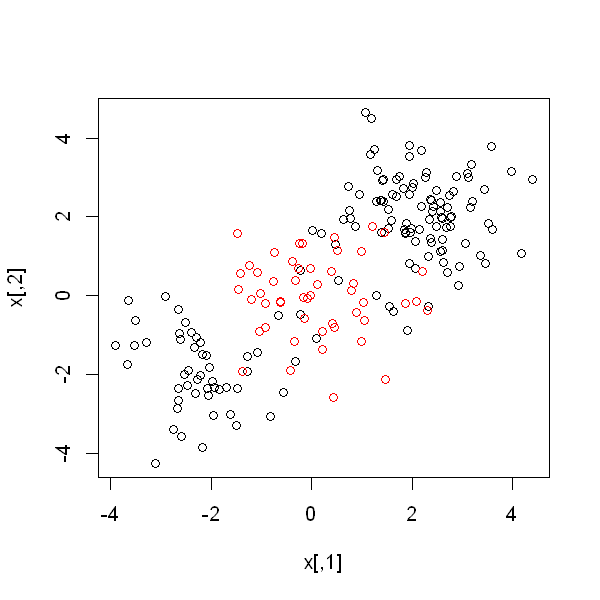

In [12]:
# データ作成
set.seed(1)
x = matrix(rnorm(200 * 2), ncol=2)
x[1:100, ] = x[1:100, ] + 2
x[101:150, ] = x[101:150, ] - 2
y = c(rep(1, 150), rep(2, 50))
dat = data.frame(x=x, y=as.factor(y))
plot(x, col=y)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2





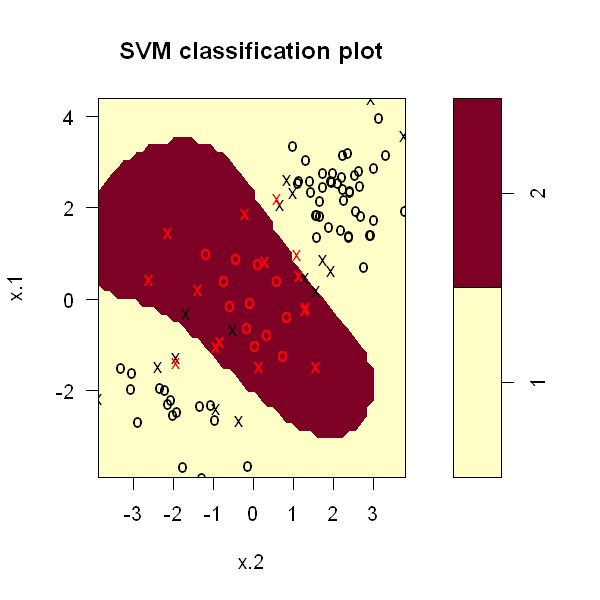

In [13]:
# radial kernel
train = sample(200, 100)
svmfit = svm(y~., data=dat[train, ], kernel="radial", gamma=1, cost=1)
plot(svmfit, dat[train, ])
print(summary(svmfit))

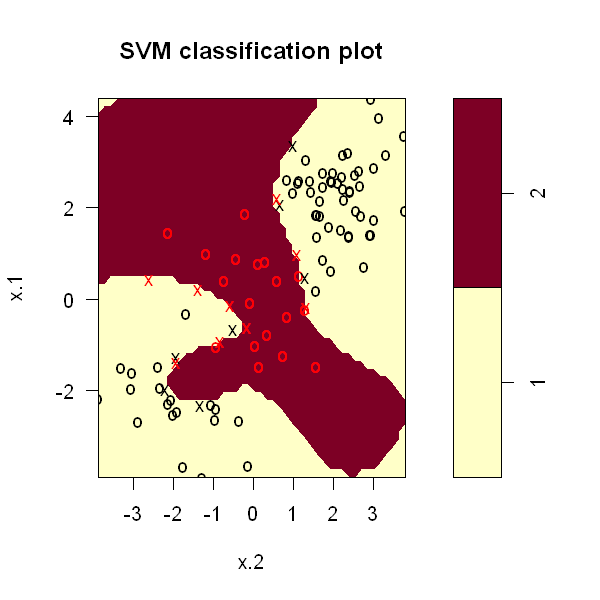

In [14]:
# cost = 1.0e05
svmfit = svm(y~., data=dat[train, ], kernel="radial", gamma=1, cost=1.0e05)
plot(svmfit, dat[train, ])

In [15]:
# tuning cost parameter
set.seed(1)
tune.out = tune(svm, y~., data=dat[train, ], kernel="radial", ranges=list(cost=c(0.1, 1, 10, 100, 1000), gamma=c(0.5, 1, 2, 3, 4)))
print(summary(tune.out))
print(table(true=dat[-train, "y"], pred=predict(tune.out$best.model, newdata=dat[-train, ])))


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.07 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.26 0.15776213
2  1e+00   0.5  0.07 0.08232726
3  1e+01   0.5  0.07 0.08232726
4  1e+02   0.5  0.14 0.15055453
5  1e+03   0.5  0.11 0.07378648
6  1e-01   1.0  0.22 0.16193277
7  1e+00   1.0  0.07 0.08232726
8  1e+01   1.0  0.09 0.07378648
9  1e+02   1.0  0.12 0.12292726
10 1e+03   1.0  0.11 0.11005049
11 1e-01   2.0  0.27 0.15670212
12 1e+00   2.0  0.07 0.08232726
13 1e+01   2.0  0.11 0.07378648
14 1e+02   2.0  0.12 0.13165612
15 1e+03   2.0  0.16 0.13498971
16 1e-01   3.0  0.27 0.15670212
17 1e+00   3.0  0.07 0.08232726
18 1e+01   3.0  0.08 0.07888106
19 1e+02   3.0  0.13 0.14181365
20 1e+03   3.0  0.15 0.13540064
21 1e-01   4.0  0.27 0.15670212
22 1e+00   4.0  0.07 0.08232726
23 1e+01   4.0  0.09 0.07378648
24 1e+02   4.0  0.13 0.14181365
25 1e+03   4.0  0.15 0

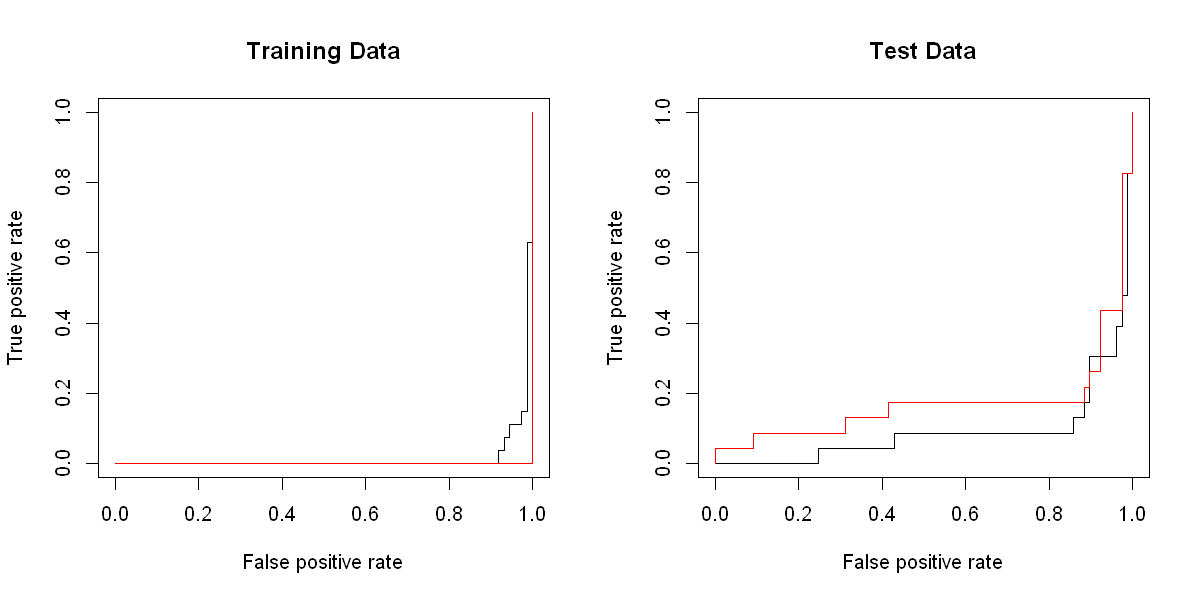

In [16]:
# ROC curves（偽陽性率を横軸，真陽性率を縦軸にした曲線）　←　普通グラフが左上にいくはずなのだが…
rocplot = function(pred, truth, ...){
    predob = prediction(pred, truth)
    perf = performance(predob, "tpr", "fpr")
    plot(perf, ...)
}

svmfit.opt = svm(y~., data=dat[train, ], kernel="radial", gamma=2, cost=1, decision.values=T)
fitted = attributes(predict(svmfit.opt, dat[train, ], decision.values=TRUE))$decision.values

par(mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=5) # jupyter用
rocplot(fitted, dat[train, "y"], main="Training Data")

svmfit.flex = svm(y~., data=dat[train, ], kernel="radial", gamma=50, cost=1, decision.values=T)
fitted = attributes(predict(svmfit.flex, dat[train, ], decision.values=T))$decision.values
rocplot(fitted, dat[train, "y"], add=T, col="red")

fitted = attributes(predict(svmfit.opt, dat[-train, ], decision.values=T))$decision.values
rocplot(fitted, dat[-train, "y"], main="Test Data")

fitted = attributes(predict(svmfit.flex, dat[-train, ], decision.values=T))$decision.values
rocplot(fitted, dat[-train, "y"], add=T, col="red")

## 4. SVMs with More than Two Classes

### 1. 一対一分類

K個のクラスに分類するために，${}_KC_2$個の分類機を作成して，最も頻繁に割り当てられたクラスに分類する手法である。

例えば，k番目のクラスかどうかをみるために，もう一つのl番目のクラスと比較して，クラスkなら+1, クラスlなら-1とする分類を，クラスkとそれ以外のクラス全てに対して行う。そして，kを変化させていき，最も点数の高いクラスに分類する。

### 2. 一対他分類

分類するクラス数Kが2より大きい場合に適応できる手法で，K個の分類機を作成する。

例えば，k番目のクラスかどうかをみるために，クラスkなら+1, そうでなければ-1とする分類をする。そして，kを変化させていき，最も点数の高いクラスに分類する。

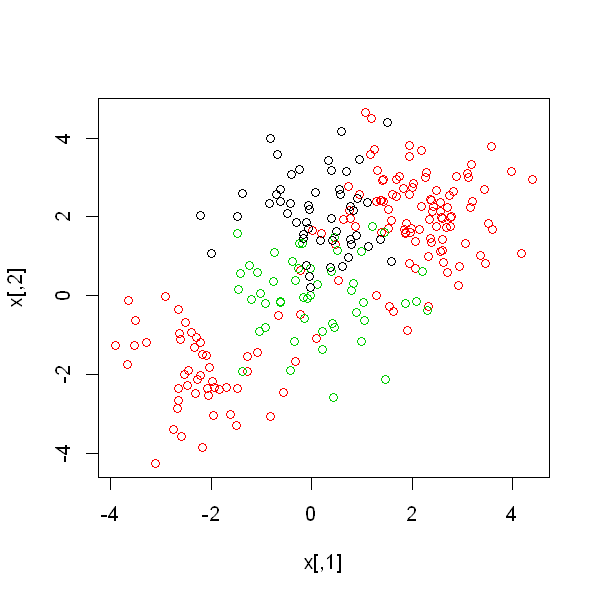

In [17]:
# Multiple Classes
set.seed(1)
x = rbind(x, matrix(rnorm(50 * 2), ncol=2))
y = c(y, rep(0, 50))
x[y == 0, 2] = x[y == 0, 2] + 2
dat = data.frame(x=x, y=as.factor(y))
options(repr.plot.width=5, repr.plot.height=5) # jupyter用
par(mfrow=c(1, 1))
plot(x, col=(y+1))

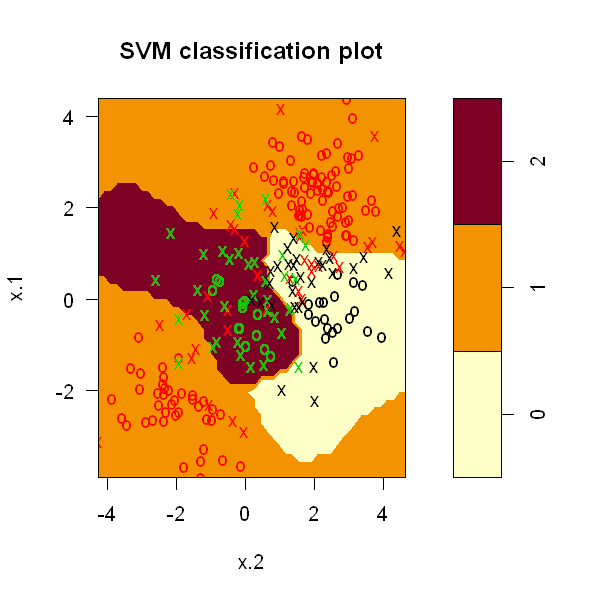

In [18]:
# SVM
svmfit = svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)

## 5. Relationship to Logistic Regression（ロジスティック回帰との関係）

式（9.12）～（9.15）は次のように書き換えることができる。
$$
\underset{\beta_0, \beta_{1}, \beta_{2}, \dots, \beta_{p}}{maximize} \{\sum_{i=1}^n max[0, 1 - y_i f(x_i)] + \lambda \sum_{i=1}^p \beta_j^2 \} \tag{9.25}
$$
ここで$\lambda$は0以上のチューニングパラメータである。$\lambda$が大きければ$\beta_1, \dots, \beta_p$は小さくなり，分散が少なく高バイアスとなり，逆も然り。$\lambda$は式（9.15）のCと同じ役割を果たす。

式（9.26）はロジスティック回帰のリッジ回帰で出てきた損失関数$L(X, y, \beta)$と罰則項$P(\beta)$を使用して，
$$
\underset{\beta_0, \beta_{1}, \beta_{2}, \dots, \beta_{p}}{maximize} \{ L(X, y, \beta) + \lambda P(\beta) \} \tag{9.26}
$$
と書き換えることができる。

サポートベクターマシンでは，損失関数は超平面からの距離より，
$$
L(X, y, \beta) = \sum_{i=1}^n max[0, 1 - y_i(\beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip})]
$$
となる。この損失関数はヒンジロスとして知られている。$y_i(\beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip} \geq 1$の時には，損失関数は0となる。このとき，観測点はマージンの正しい方にあることを示している。

ロジスティック回帰の損失関数はサポートベクターマシンの損失関数を滑らかにしたようなグラフとなり，類似する。そのため，クラスがうまく分離されているときにはサポートベクターマシンを，重なり合うときはロジスティック回帰を使うと良い。

In [19]:
# Gene data（もともと訓練データとテストデータに分かれている）
library(ISLR)
dat = data.frame(x = Khan$xtrain, y = as.factor(Khan$ytrain))
dat.te = data.frame(x = Khan$xtest, y = as.factor(Khan$ytest))

In [20]:
# SVM
out = svm(y~., data=dat, kernel='linear', cost=10)
print(summary(out))
print(table(out$fitted, dat$y))


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4



   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20


In [21]:
# predict
pred.te = predict(out, newdata=dat.te)
table(pred.te, dat.te$y)

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5

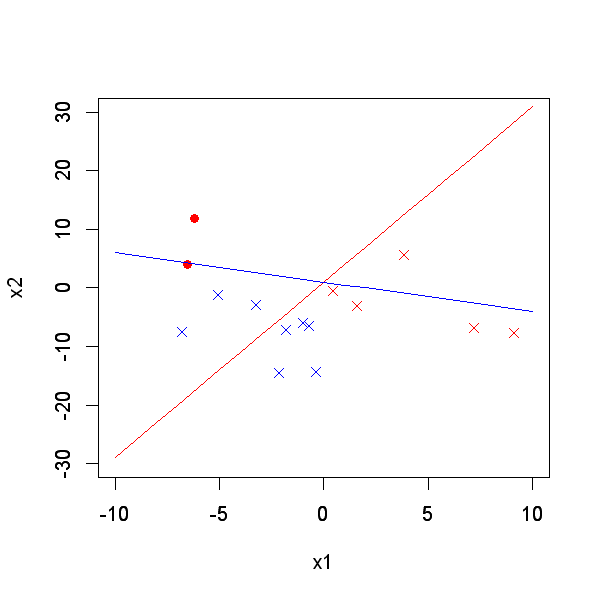

In [22]:
# Exercises
# 1
x1 = -10:10
x2 = 1 + 3 * x1
plot(x1, x2, type='l', col='red', xlim=c(-10, 10), ylim=c(-30, 30))
par(new=T)
p1_x1 = rnorm(10) * 10
p1_x2 = rnorm(10) * 3 * p1_x1
plot(p1_x1, p1_x2, col='red', pch=ifelse(p1_x2 > 1 + 3 * p1_x1, 16, 4), xlim=c(-10, 10), ylim=c(-30, 30), xlab='', ylab='')
par(new=T)
x2 = 1 - x1 / 2
plot(x1, x2, type='l', col='blue', xlim=c(-10, 10), ylim=c(-30, 30))
p2_x1 = rnorm(10) * 10
p2_x2 = rnorm(10) * 3 * p1_x1
par(new=T)
plot(p2_x1, p2_x2, col='blue', pch=ifelse(p2_x2 > 1 - p2_x1 / 2, 16, 4), xlim=c(-10, 10), ylim=c(-30, 30), xlab='', ylab='')

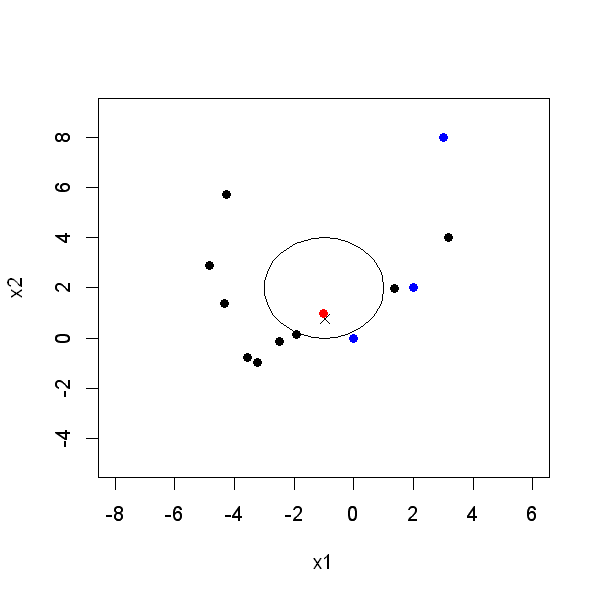

In [23]:
# 2
theta = seq(-pi, pi, length=100)
x1 = 2 * cos(theta) - 1
x2 = 2 * sin(theta) + 2
plot(x1, x2, type='l', xlim=c(-8, 6), ylim=c(-5, 9)) # (a)
par(new=T)
p1_x1 = rnorm(10, -1, 2)
p1_x2 = rnorm(10, 2, 2)
plot(p1_x1, p1_x2, pch=ifelse((1 + p1_x1)^2 + (2 - p1_x2)^2 > 4, 16, 4), xlim=c(-8, 6), ylim=c(-5, 9), xlab='', ylab='')
par(new=T)
p2_x1 = c(0, -1, 2, 3)
p2_x2 = c(0, 1, 2, 8)
plot(p2_x1, p2_x2, pch=16, col=ifelse((1 + p2_x1)^2 + (2 - p2_x2)^2 > 4, 'blue', 'red'), xlim=c(-8, 6), ylim=c(-5, 9), xlab='', ylab='')

#### (d)
展開して，$f(X_1, X_2) = 0$の形にすればよい。
$$
1 + 2X_1 -4X_2 + X_1^2 + X_2^2 = 0
$$

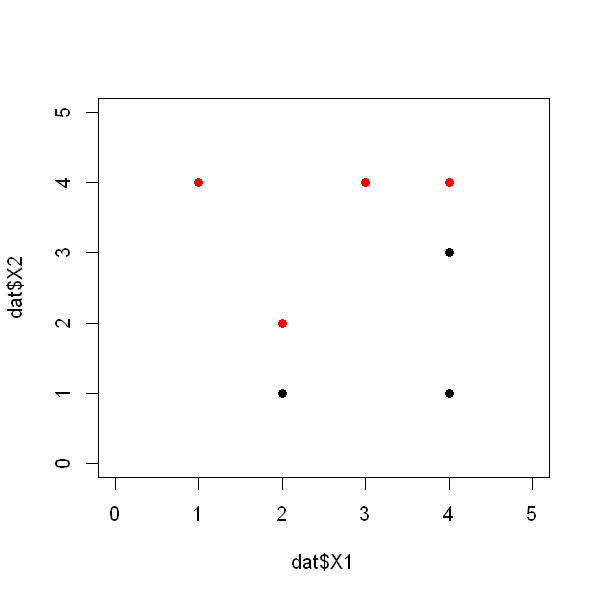

In [24]:
# 3
# (a)
x1 = c(3, 2, 4, 1, 2, 4, 4)
x2 = c(4, 2, 4, 4, 1, 3, 1)
y = c('Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue')
dat = data.frame(X1=x1, X2=x2, Y=y)
plot(dat$X1, dat$X2, col=dat$Y, xlim=c(0, 5), ylim=c(0, 5), pch=16)

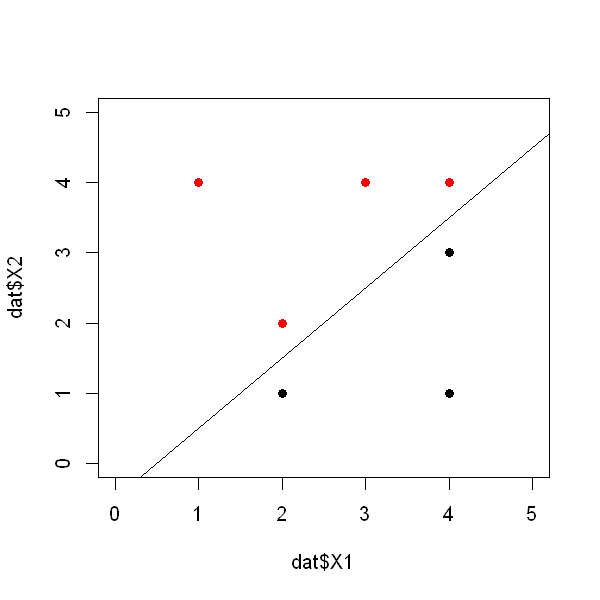

In [25]:
# (b)
plot(dat$X1, dat$X2, col=dat$Y, xlim=c(0, 5), ylim=c(0, 5), pch=16)
abline(-0.5, 1) # -0.5 + X1 = X2

#### (c)
先程の直線より，$\beta_0 = 0.5, \beta_1 = -1, \beta_2 = 1$.

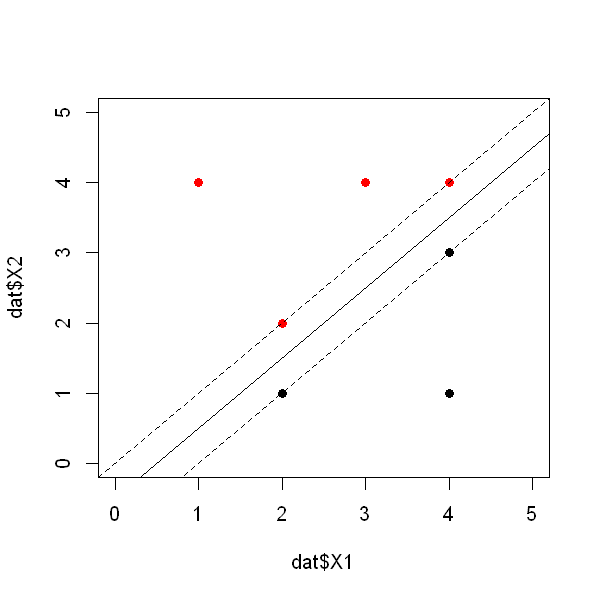

In [26]:
# (d)
plot(dat$X1, dat$X2, col=dat$Y, xlim=c(0, 5), ylim=c(0, 5), pch=16)
abline(-0.5, 1) # -0.5 + X1 = X2
abline(-1, 1, lty=2)
abline(0, 1, lty=2)

・単位法線ベクトル
$$
\frac{(\beta_1, \beta_2)}{\sqrt{\beta_1^2 + \beta_2^2}}
$$
・点と直線の距離
$$
\frac{|\beta_0 + \beta_1 X_1 + \beta_2 X_2|}{\sqrt{\beta_1^2 + \beta_2^2}}
$$
単位ベクトルと距離をかけて垂線の足の場所を求める

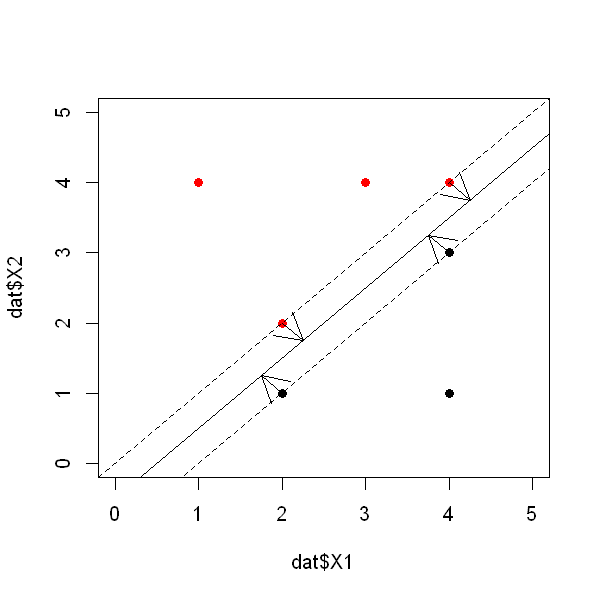

In [27]:
# (e)
plot(dat$X1, dat$X2, col=dat$Y, xlim=c(0, 5), ylim=c(0, 5), pch=16)
abline(-0.5, 1) # -0.5 + X1 = X2
abline(-1, 1, lty=2)
abline(0, 1, lty=2)

# ライン上の点からサポートベクトルを描く
# 黒点から
arrows(c(2, 4), c(1, 3), c(2, 4) - (0.5 - 1 * c(2, 4) + c(1, 3)) * (-1) / ((-1)^2 + 1^2), c(1, 3) - (0.5 - 1 * c(2, 4) + c(1, 3)) * 1 / ((-1)^2 + 1^2))
# 赤点から
arrows(c(2, 4), c(2, 4), c(2, 4) - (0.5 - 1 * c(2, 4) + c(2, 4)) * (-1) / ((-1)^2 + 1^2), c(2, 4) - (0.5 - 1 * c(2, 4) + c(2, 4)) * 1 / ((-1)^2 + 1^2))

#### (f)
7番目のデータはマージンの外側なので，多少動いても超平面への影響はない。

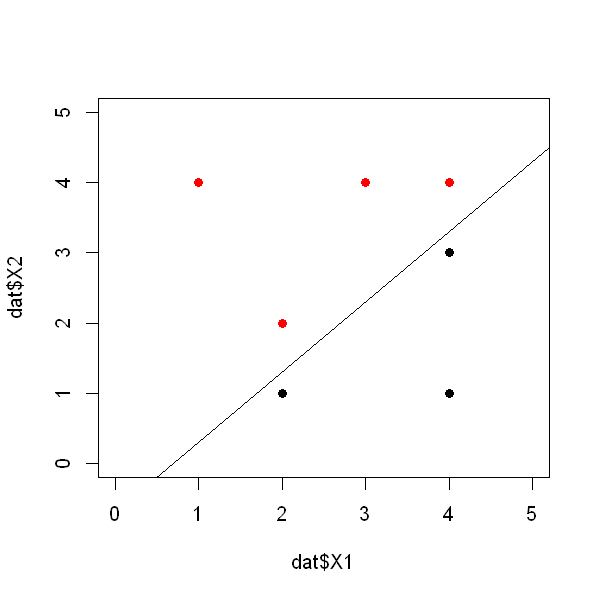

In [28]:
# (g)少しずらすだけ
plot(dat$X1, dat$X2, col=dat$Y, xlim=c(0, 5), ylim=c(0, 5), pch=16)
abline(-0.7, 1) # -0.7 + X1 = X2

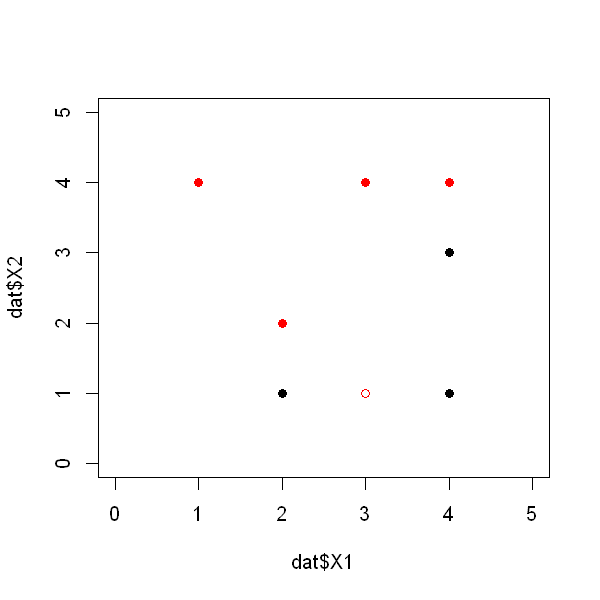

In [29]:
# (h) 反対側のマージン直線の向こう側に点があればいい
plot(dat$X1, dat$X2, col=dat$Y, xlim=c(0, 5), ylim=c(0, 5), pch=16)
points(c(3), c(1), col='red')

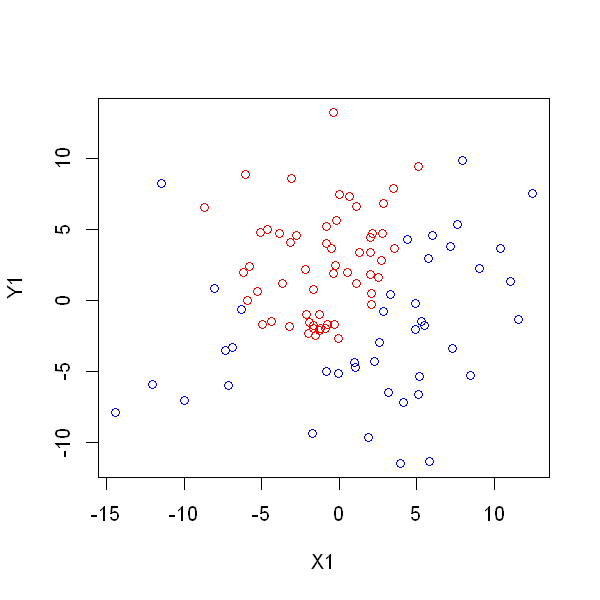

In [30]:
# 4
# まずは100個を2つのクラスにする
dat = data.frame(X1 = rnorm(100) * 5, X2 = rnorm(100) * 5)
dat$class = ifelse(dat$X2 > (dat$X1 + 2) ** 2 / 4 - 5, 'red', 'blue')
plot(dat$X1, dat$X2, col=dat$class, xlab='X1', ylab='Y1')

In [31]:
# train & test
dat$class = as.factor(dat$class) # 数値にする
train = sample(100, 50)
dat_train = dat[train, ]
dat_test = dat[-train, ]

In [32]:
# polynomial
svm_pol = svm(class~., data=dat_train, kernel='polynomial')
print(summary(svm_pol))


Call:
svm(formula = class ~ ., data = dat_train, kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  23

 ( 11 12 )


Number of Classes:  2 

Levels: 
 blue red





In [33]:
# 比較
svm_pol_pred = predict(svm_pol, dat_test, type='response')
print(table(dat_test$class, svm_pol_pred))

      svm_pol_pred
       blue red
  blue    6  17
  red     0  27


In [34]:
# radial
svm_rad = svm(class~., data=dat_train, kernel='radial')
print(summary(svm_rad))


Call:
svm(formula = class ~ ., data = dat_train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  21

 ( 10 11 )


Number of Classes:  2 

Levels: 
 blue red





In [35]:
# 比較（こちらの方が赤に誤分類される数が減少した）
svm_rad_pred = predict(svm_rad, dat_test, type='response')
print(table(dat_test$class, svm_rad_pred))

      svm_rad_pred
       blue red
  blue   16   7
  red     0  27


In [36]:
# 5
# (a)
X1 = runif(500) - 0.5
X2 = runif(500) - 0.5
Y = 1 * (X1 ^ 2 - X2 ^ 2 > 0)

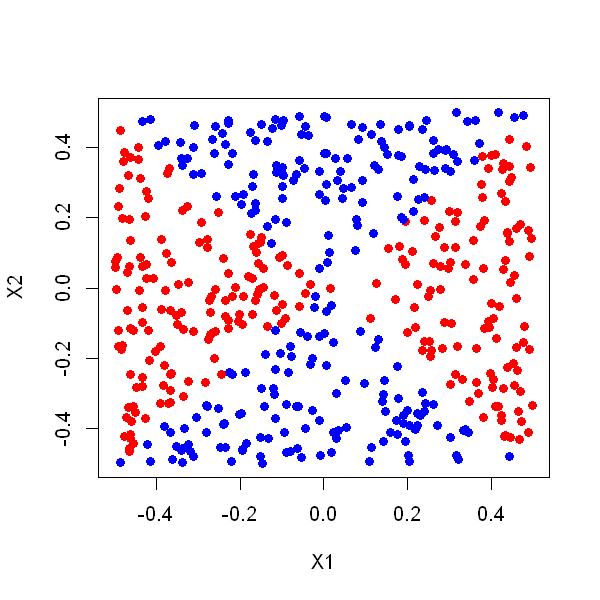

In [37]:
# (b)
plot(X1, X2, col=ifelse(Y == 1, 'red', 'blue'), pch=16)

In [38]:
# (c)
Y = as.factor(ifelse(Y == 1, 'red', 'blue'))
glm_fit = glm(Y ~ X1 + X2, family=binomial)
print(summary(glm_fit))


Call:
glm(formula = Y ~ X1 + X2, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.304  -1.164   1.070   1.155   1.258  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03459    0.08982   0.385    0.700
X1          -0.08735    0.30121  -0.290    0.772
X2          -0.43441    0.30044  -1.446    0.148

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 692.95  on 499  degrees of freedom
Residual deviance: 690.70  on 497  degrees of freedom
AIC: 696.7

Number of Fisher Scoring iterations: 3



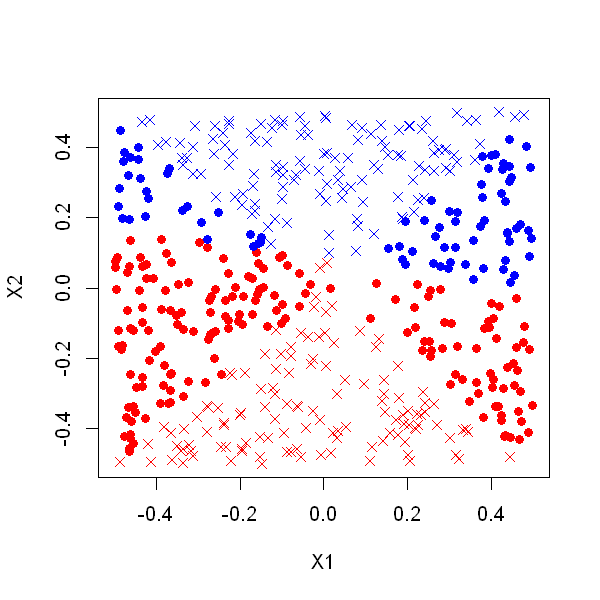

In [39]:
# (d)
glm_pred = predict(glm_fit, data.frame(X1, X2), type='response')
plot(X1, X2, col=ifelse(glm_pred > 0.5, 'red', 'blue'), pch=ifelse(Y == 'red', 16, 4))

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

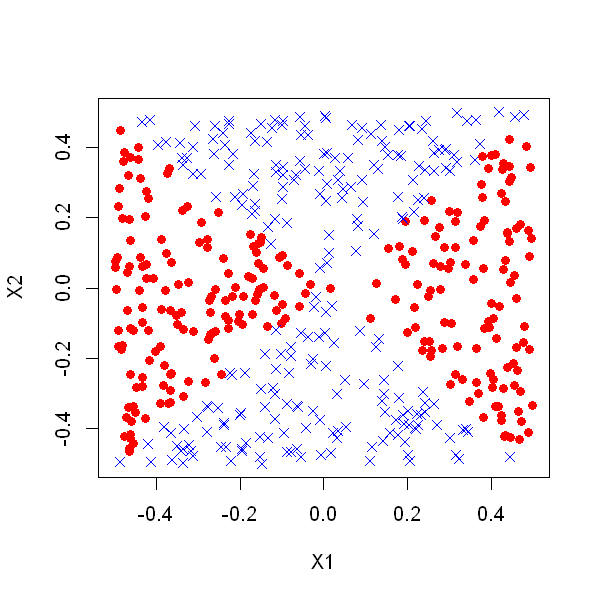

In [40]:
# (e), (f)
# 最初に2乗にして条件分けしたので，2乗を適用してみる
glm_fit = glm(Y ~ poly(X1, 2) + poly(X2, 2), family=binomial)
glm_pred = predict(glm_fit, data.frame(X1, X2), type='response')
plot(X1, X2, col=ifelse(glm_pred > 0.5, 'red', 'blue'), pch=ifelse(Y == 'red', 16, 4))

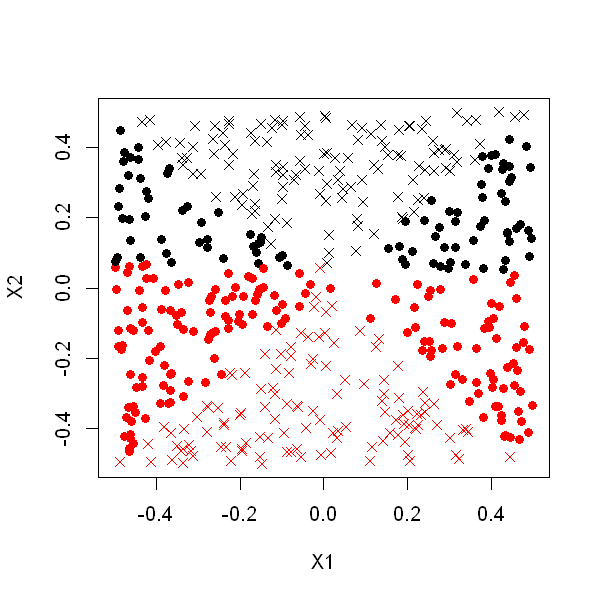

In [41]:
# (g)
svm_fit = svm(Y ~ ., data=data.frame(X1, X2, Y), kernel='linear')
svm_pred = predict(svm_fit, data.frame(X1, X2), type='response')
plot(X1, X2, col=svm_pred, pch=ifelse(Y == 'red', 16, 4))

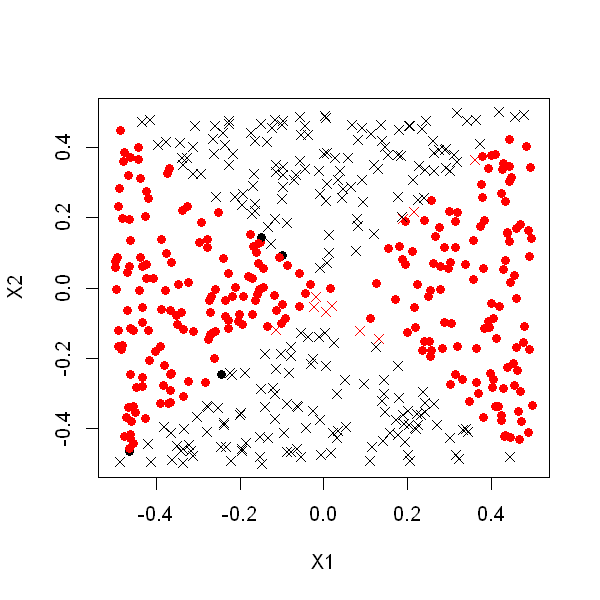

In [42]:
# (h)
svm_fit = svm(Y ~ ., data=data.frame(X1, X2, Y), kernel='polynomial', degree=2, cost=1.0)
svm_pred = predict(svm_fit, data.frame(X1, X2), type='response')
plot(X1, X2, col=svm_pred, pch=ifelse(Y == 'red', 16, 4))

#### (i)
ロジスティック回帰の場合，トレーニングデータと同じデータに予測式を適用させると100％の分類精度があった。しかし，サポートベクターマシンの場合，分類の異なる点が存在する。これはサポートベクトルを用いて多少の誤分類を許すからであると考えられる。

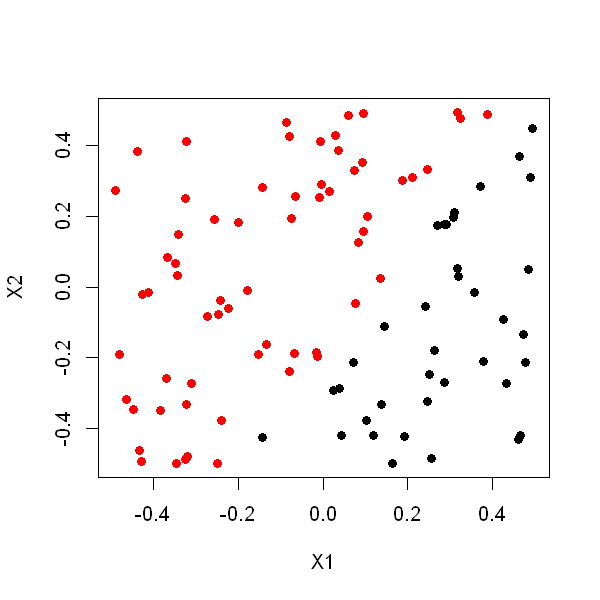

In [43]:
# 6
# (a)
X1 = runif(100) - 0.5
X2 = runif(100) - 0.5
Y = as.factor(ifelse(X2 > 1.5 * X1 - 0.2, 'red', 'blue'))
dat = data.frame(X1, X2, Y)

plot(X1, X2, col=Y, pch=16)

In [44]:
# (b)
# tuneを使えばよい(bestは0.5)
tune_out = tune(svm, Y~., data=dat, kernel="linear", ranges=list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100)))
print(summary(tune_out))


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.5

- best performance: 0.01 

- Detailed performance results:
   cost error dispersion
1 1e-02  0.37 0.09486833
2 5e-02  0.03 0.06749486
3 1e-01  0.02 0.04216370
4 5e-01  0.01 0.03162278
5 1e+00  0.02 0.04216370
6 5e+00  0.01 0.03162278
7 1e+01  0.01 0.03162278
8 5e+01  0.01 0.03162278
9 1e+02  0.01 0.03162278



In [45]:
# (c) 今度はC＝1がベスト
costs = c(0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100)
X1 = rnorm(200) - 0.5
X2 = rnorm(200) - 0.5
Y = as.factor(ifelse(X2 > 1.5 * X1 - 0.2, 'red', 'blue'))
dat = data.frame(X1, X2, Y)
train = sample(200, 100)
dat_train = dat[train, ]
dat_test = dat[-train, ]

test_errors = rep(NA, length(costs))
for (i in 1:length(costs)){
    svm_fit = svm(Y~., data=dat_train, kernel='linear', cost=costs[i])
    svm_pred = predict(svm_fit, dat_test)
    test_errors[i] = sum(dat_test$Y != svm_pred)
}

result = data.frame(cost = costs, misclass=test_errors, error_rate=test_errors/100)
print(result)

   cost misclass error_rate
1 1e-02       30       0.30
2 5e-02        8       0.08
3 1e-01        4       0.04
4 5e-01        1       0.01
5 1e+00        0       0.00
6 5e+00        2       0.02
7 1e+01        3       0.03
8 5e+01        1       0.01
9 1e+02        1       0.01


#### (d)
予測式をトレーニングデータに適用させる場合と，テストデータに適用させる場合の違いだけでも，最適なコストが変化してしまう。

**参考文献**  
kfumix, [ ISLR: Chapter 9 Support Vector Machine ](http://kfumix.hatenablog.com/entry/2017/06/27/002020) (2019/7/4)